# Exercise 06: Charge Detector
\- Gugliemo Grillo

<div><table>
  <tr>
    <td style="width: 55%"><img src="https://i.ibb.co/zrbRZgp/Charge-Detector-1.png"/></td>
    <td style="width: 45%"><img src="https://i.ibb.co/k312nV6/Charge-Detector-2.png"/></td>
  </tr>
</table></div>

### Temperature is assumed to be room temperature $T=293K$

The resistor and the capacitor are in parallel. Thus the equivalent impedance can be written as:

$$ Z_{eq}(\omega) = \bigl( \frac{1}{R} + i\omega C \bigr)^{-1} = \frac{R}{1+i \omega RC} = \frac{R}{1+i \omega \tau}$$

where $\tau = RC$. The characteristic equation of the circuit, in the frequency domain, is

$$V(\omega) = Z_{eq}(\omega)I(\omega) + V_n = Z_{eq}(\omega)\bigl[ I(\omega) + \frac{V_n}{Z_{eq}(\omega)} \bigr] $$

Where the amplifier noise has been rewritten as an input noise. 

The power spectral densities of the two main components are:
\begin{itemize}
\item White noise from the Amplifier (from the graph given): $S_0\simeq3.7\ nV/\sqrt{Hz}$
\item Impedance (from Nyquist-Johnson formula):
    $$S_{V_Z, V_Z}=2 k_b T Re[Z_{eq}(\omega)] = 2 k_b T \frac{R}{1+\omega ^2 \tau^2}$$
\end{itemize}

As the minimum error on input is asked, all the quantities will be brought to input. Regarding the PSD of the amplifier:
$$ S_{I_n, I_n} = \frac{V_n}{|H(\omega)|^2} = S_0 \frac{1+\omega^2 \tau^2 }{R^2}$$

On the other hand, for the Nyquist-Johnson thermal noise:
$$S_{I_Z, I_Z}=\frac{S_{V_Z, V_Z}}{{|H(\omega)|^2}} = 2 k_b T \frac{R}{1+\omega ^2 \tau^2} \frac{1+\omega^2 \tau^2 }{R^2} = \frac{2 k_b T}{R} $$

Assuming the two noise uncorrelated, the cumulative PSD is:
$$S_{I, I} = S_{I_n, I_n} + S_{I_Z, I_Z} = S_0 \frac{1+\omega^2 \tau^2 + 2 k_b T R }{R^2}$$


The signal can be extracted with Wiener's optimal filter theory. The template of the signal is $\mathcal{FT}\bigl[\delta(t) \bigr](\omega) = 1$. Minimum error is therefore:

$$ \sigma_e = \bigl( \frac{1}{2\pi}\int_{-\infty}^{+\infty}\frac{1}{S_{I, I}(\omega)}d\omega \bigr)^{1/2} =
              \bigl( \frac{1}{2\pi}\int_{-\infty}^{+\infty} \frac{R^2}{S_0(1+\omega^2 \tau^2 + 2 k_b T R) } d\omega \bigr)^{1/2} = \bigl( \frac{R^2}{S_0\pi}\int_{-\infty}^{+\infty} \frac{1}{1+\omega^2 \tau^2 + 2 k_b T R} d\omega \bigr)^{1/2}$$

In [3]:
# packages used
import scipy.constants
from scipy.integrate import quad

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Math

# Given constans
kb = scipy.constants.Boltzmann
T = 293 #K
R = 100e3 #Ohm
C = 500e-12 #F
S0 = 3.7e-9 #V/sqrt(Hz) 

# Parameters redefinition
TAU = R*C # [Hz]

display(Math(r'\tau = {:.5e} Hz'.format(TAU)))

<IPython.core.display.Math object>

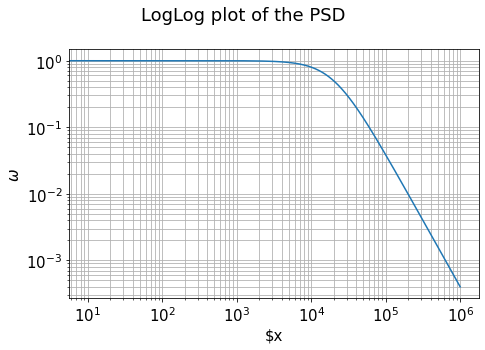

The value of the integral with his error is:


<IPython.core.display.Math object>

The value of the minimum error is therefore:


<IPython.core.display.Math object>

In [4]:
def integrand(omega):
    return 1/(1+np.power(omega, 2)*TAU**2+ 2*kb*T*R)

# Bode plot
plt.rcParams.update({'font.size': 15})
fig, axis = plt.subplots(1,1, figsize=(7, 5))
fig.suptitle('LogLog plot of the PSD')

x = np.linspace(0, 1e6, int(1e5))
plt.ticklabel_format(axis="both", style="sci", scilimits=(0,0)) 
axis.plot(x, integrand(x) )
axis.set_xscale('log')
axis.set_yscale('log')

axis.set_xlabel(r"$x")
axis.set_ylabel(r"$\omega$")
axis.grid(True, which="both")

fig.tight_layout()
plt.show()

I = 2*quad(integrand, 0, np.inf)
print('The value of the integral with his error is:')
display(Math(r'I={:.9e}\pm {:.1}'.format(I[0], I[1])))

SigmaE = np.power(2*R**2/S0 * I[0], -1/2)
print("The value of the minimum error is therefore:")
display(Math(r'\sigma_e ={:.9e}'.format(SigmaE)))

It's then possible to reliably measure charge bigger than $q>2.4x10^{-12} C$.